## Classification Model Using Decision Tree

# Follow the EDA steps

# 1. Calling class
# 2. Defining data
# 3. Applying Machine Learning Algorithm
# 4. Predicting data
# 5. Evaluating data

## 1. Calling class

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Defining the data 

### Reading the data

In [73]:
data=pd.read_csv("mlb_elo.csv")
data.head(5)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2019-10-30,2019,0,w,HOU,WSN,1599.54,1584.36,0.57,0.43,...,56.92,61.72,0.99,27.78,0.52,0.48,1587.97,1583.38,2,6
1,2019-10-29,2019,0,w,HOU,WSN,1605.07,1578.84,0.60,0.40,...,62.98,60.27,28.72,21.78,0.59,0.41,1591.03,1580.33,2,7
2,2019-10-27,2019,0,w,WSN,HOU,1584.01,1599.90,0.52,0.48,...,49.43,66.89,-29.81,47.89,0.37,0.63,1576.19,1595.17,1,7
3,2019-10-26,2019,0,w,WSN,HOU,1589.99,1593.92,0.54,0.46,...,56.00,51.25,0.82,-24.89,0.59,0.41,1578.72,1592.63,1,8
4,2019-10-25,2019,0,w,WSN,HOU,1593.83,1590.08,0.55,0.45,...,54.04,57.10,-9.05,2.44,0.53,0.47,1583.72,1587.64,1,4


### Adding column "result" into a dataset

In [74]:
conditions=[data['score1']>data['score2'],data['score1']<data['score2']]
values=[1,0]
data['result']=np.select(conditions,values)

### Grouping the value of the target variable i.e. result

In [75]:
result_count=data.groupby('result').size()
print(result_count)

result
0    1163
1    1303
dtype: int64


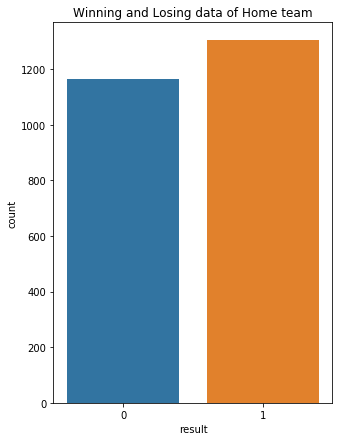

In [110]:
fig = plt.subplots(figsize=(5,7))
sns.countplot('result',data = data)
plt.title("Winning and Losing data of Home team")
plt.show()

### Viewing the data

In [77]:
data.head(5)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,result
0,2019-10-30,2019,0,w,HOU,WSN,1599.54,1584.36,0.57,0.43,...,61.72,0.99,27.78,0.52,0.48,1587.97,1583.38,2,6,0
1,2019-10-29,2019,0,w,HOU,WSN,1605.07,1578.84,0.60,0.40,...,60.27,28.72,21.78,0.59,0.41,1591.03,1580.33,2,7,0
2,2019-10-27,2019,0,w,WSN,HOU,1584.01,1599.90,0.52,0.48,...,66.89,-29.81,47.89,0.37,0.63,1576.19,1595.17,1,7,0
3,2019-10-26,2019,0,w,WSN,HOU,1589.99,1593.92,0.54,0.46,...,51.25,0.82,-24.89,0.59,0.41,1578.72,1592.63,1,8,0
4,2019-10-25,2019,0,w,WSN,HOU,1593.83,1590.08,0.55,0.45,...,57.10,-9.05,2.44,0.53,0.47,1583.72,1587.64,1,4,0


### Shape of the data i.e. data is of standard variance

In [78]:
data.shape

(2466, 27)

### Deleting the unwanted columns from the dataset

In [79]:
data = data.drop(columns=["score1","score2"])

In [80]:
data=data.drop(columns=["date","rating1_post","rating2_post","team1","team2"])

In [81]:
data=data.drop(columns=["pitcher1","pitcher2","playoff","season","neutral","elo1_post","elo2_post"])

### Displaying the width of the dataset

In [82]:
pd.set_option('display.width',100)

In [83]:
data.describe()

,elo1_pre,elo2_pre,elo_prob1,elo_prob2,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,result
count,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00
mean,1506.17,1506.04,0.53,0.47,1506.07,1506.01,50.79,50.92,0.91,1.41,0.53,0.47,0.53
std,43.52,43.58,0.09,0.09,45.67,45.63,4.41,4.39,17.28,16.95,0.10,0.10,0.50
min,1380.75,1377.39,0.27,0.22,1386.35,1383.39,38.80,38.65,-54.86,-66.76,0.25,0.19,0.00
25%,1473.27,1473.70,0.48,0.41,1474.37,1475.07,47.71,47.77,-11.13,-10.28,0.47,0.40,0.00
50%,1508.95,1507.45,0.54,0.46,1512.28,1512.24,50.14,50.23,0.78,0.91,0.54,0.46,1.00
75%,1540.12,1540.21,0.59,0.52,1537.71,1537.49,53.16,53.34,11.82,12.25,0.60,0.53,1.00
max,1605.07,1603.77,0.78,0.73,1598.56,1599.13,68.00,67.74,57.72,54.73,0.81,0.75,1.00


### Precision of dataset by 2 decimal places

In [84]:
pd.set_option('precision',2)

In [85]:
data.describe()

,elo1_pre,elo2_pre,elo_prob1,elo_prob2,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,result
count,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00
mean,1506.17,1506.04,0.53,0.47,1506.07,1506.01,50.79,50.92,0.91,1.41,0.53,0.47,0.53
std,43.52,43.58,0.09,0.09,45.67,45.63,4.41,4.39,17.28,16.95,0.10,0.10,0.50
min,1380.75,1377.39,0.27,0.22,1386.35,1383.39,38.80,38.65,-54.86,-66.76,0.25,0.19,0.00
25%,1473.27,1473.70,0.48,0.41,1474.37,1475.07,47.71,47.77,-11.13,-10.28,0.47,0.40,0.00
50%,1508.95,1507.45,0.54,0.46,1512.28,1512.24,50.14,50.23,0.78,0.91,0.54,0.46,1.00
75%,1540.12,1540.21,0.59,0.52,1537.71,1537.49,53.16,53.34,11.82,12.25,0.60,0.53,1.00
max,1605.07,1603.77,0.78,0.73,1598.56,1599.13,68.00,67.74,57.72,54.73,0.81,0.75,1.00


### Correlation of dataset 

In [86]:
correlation=data.corr()
print(correlation)

              elo1_pre  elo2_pre  elo_prob1  elo_prob2  rating1_pre  rating2_pre  pitcher1_rgs  \
elo1_pre      1.00e+00 -2.04e-02       0.72      -0.72     9.72e-01    -2.88e-02      4.23e-01   
elo2_pre     -2.04e-02  1.00e+00      -0.71       0.71    -3.73e-02     9.73e-01     -4.47e-03   
elo_prob1     7.18e-01 -7.09e-01       1.00      -1.00     7.10e-01    -6.96e-01      3.04e-01   
elo_prob2    -7.18e-01  7.09e-01      -1.00       1.00    -7.10e-01     6.96e-01     -3.04e-01   
rating1_pre   9.72e-01 -3.73e-02       0.71      -0.71     1.00e+00    -4.26e-02      4.49e-01   
rating2_pre  -2.88e-02  9.73e-01      -0.70       0.70    -4.26e-02     1.00e+00     -5.00e-04   
pitcher1_rgs  4.23e-01 -4.47e-03       0.30      -0.30     4.49e-01    -5.00e-04      1.00e+00   
pitcher2_rgs -5.97e-03  4.40e-01      -0.31       0.31    -7.53e-03     4.62e-01      1.52e-02   
pitcher1_adj -2.95e-02  2.30e-02      -0.03       0.03    -3.29e-02     2.68e-02      8.00e-01   
pitcher2_adj  2.42e-

### Visualization of correlation matrix

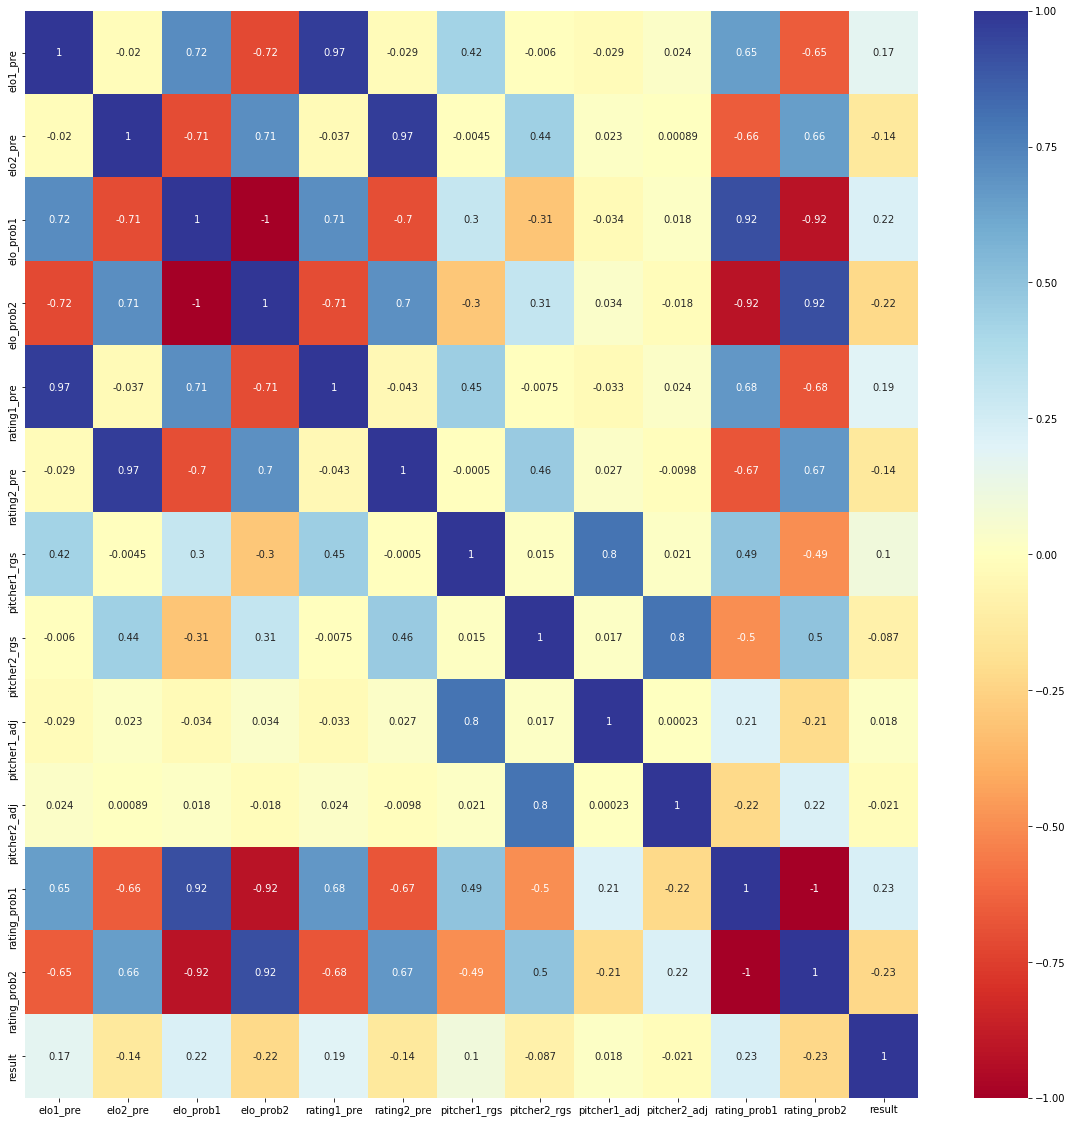

In [87]:
correlation=data.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlBu")

### Droping columns based on high and low correlation

In [88]:
data=data.drop(columns=["rating_prob1","rating_prob2"])

In [89]:
data=data.drop(columns=["elo_prob1","elo_prob2"])

In [90]:
data=data.drop(columns=["rating1_pre","rating2_pre"])

In [91]:
data=data.drop(columns=["pitcher1_adj","pitcher2_adj"])

### After removing high and low correlated data

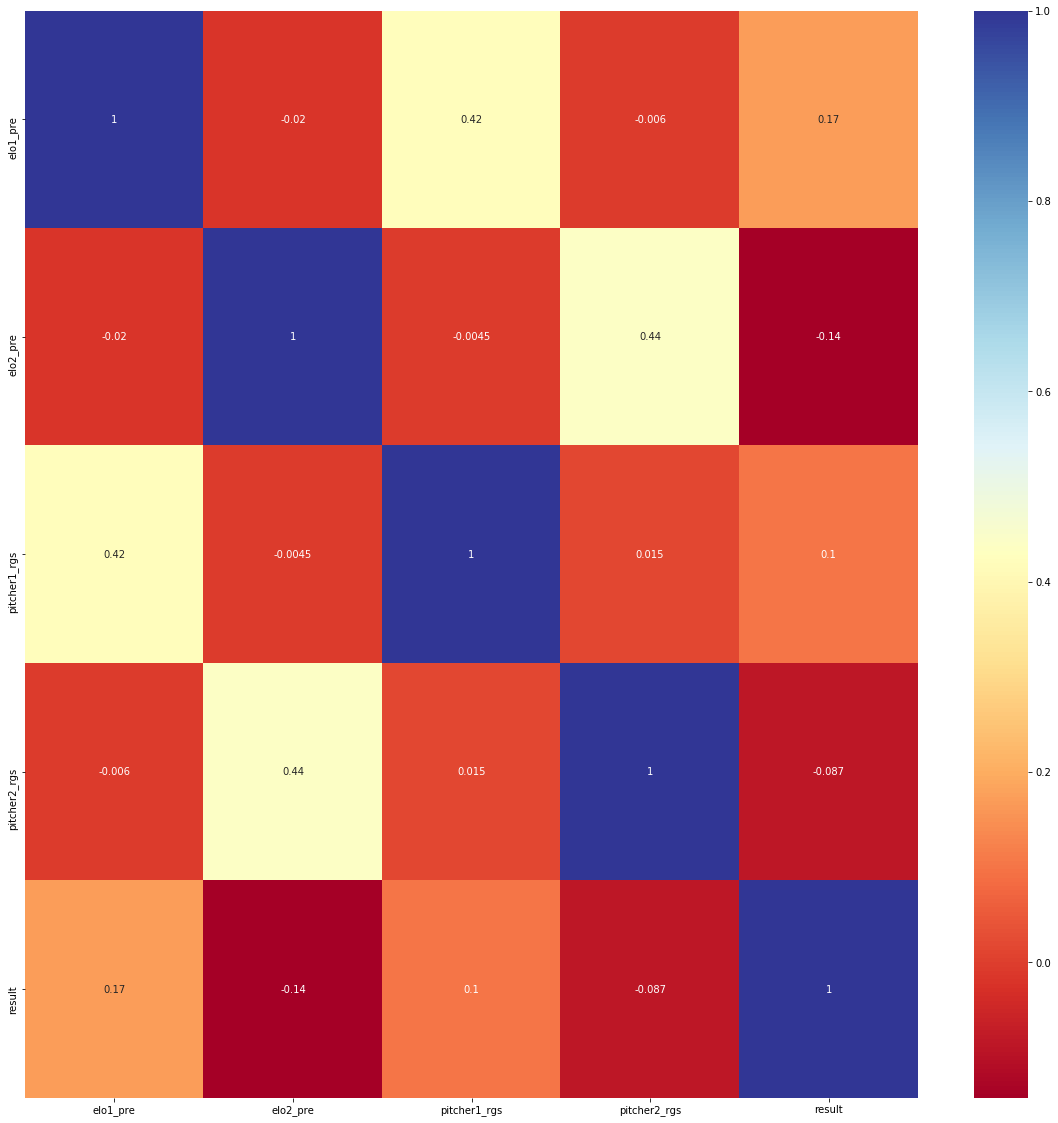

In [92]:
correlation=data.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlBu")

### Skewing the data

In [93]:
skew_data=data.skew()
print(skew_data)

elo1_pre       -0.22
elo2_pre       -0.20
pitcher1_rgs    0.71
pitcher2_rgs    0.66
result         -0.11
dtype: float64


### Ploting Histogram of the dataset

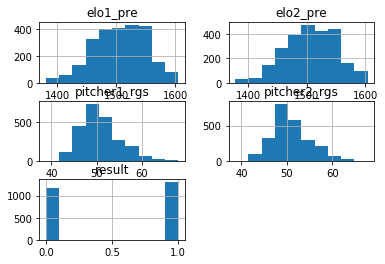

In [94]:
histogram=data.hist()

### Viewing data

In [95]:
data.head()

,elo1_pre,elo2_pre,pitcher1_rgs,pitcher2_rgs,result
0,1599.54,1584.36,56.92,61.72,0
1,1605.07,1578.84,62.98,60.27,0
2,1584.01,1599.90,49.43,66.89,0
3,1589.99,1593.92,56.00,51.25,0
4,1593.83,1590.08,54.04,57.10,0


### Box Plot of dataset

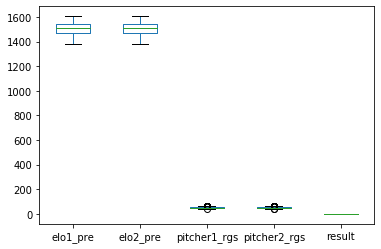

In [96]:
box=data.plot(kind='box',subplots=False,layout=(3,3),sharex=False,sharey=False)

### Density graph of dataset

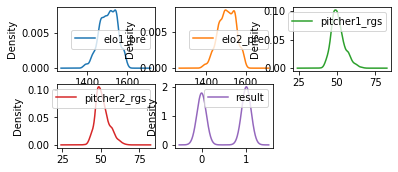

In [97]:
density=data.plot(kind='density',subplots=True,layout=(3,3),sharex=False,sharey=False)

### Rescaling data from 0 to 1 range

In [98]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
array=data.values
x=array[:,0:4]
scale=MinMaxScaler(feature_range=(0,1))
rescale_data=scale.fit_transform(x)
set_printoptions(precision=3)
print(rescale_data[0:5,:])

[[0.975 0.914 0.621 0.793]
 [1.    0.89  0.828 0.743]
 [0.906 0.983 0.364 0.971]
 [0.933 0.957 0.589 0.433]
 [0.95  0.94  0.522 0.634]]


### Data Standardisation

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rescale_data=scaler.fit_transform(x)
set_printoptions(precision=3)
print(rescale_data[0:5,:])

[[ 2.146  1.797  1.393  2.463]
 [ 2.273  1.671  2.768  2.132]
 [ 1.789  2.154 -0.307  3.64 ]
 [ 1.926  2.017  1.185  0.076]
 [ 2.015  1.929  0.738  1.408]]


### Data Normalization

In [100]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
rescale_data=scaler.fit_transform(x)
set_printoptions(precision=3)
print(rescale_data[0:5,:])

[[0.71  0.703 0.025 0.027]
 [0.712 0.701 0.028 0.027]
 [0.703 0.71  0.022 0.03 ]
 [0.706 0.708 0.025 0.023]
 [0.708 0.706 0.024 0.025]]


### Adding the normalized data into dataframe

In [101]:
rescale_data=pd.DataFrame(rescale_data)

In [102]:
feature_data=rescale_data.values
label_data=data.values[:,4]

### Training the data into 70 - 30% ratio

In [103]:
trainf,testf,trainl,testl = train_test_split(feature_data,label_data,test_size=.30,random_state=15)

In [104]:
print(len(trainf))
print(len(testf))
print(len(trainl))
print(len(testl))

1726
740
1726
740


## 3. Fitting the model

In [105]:
classifier=DecisionTreeClassifier()

In [106]:
classifier.fit(trainf,trainl)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 4. Data Prediction

In [107]:
pred_res=classifier.predict(testf)

## 5. Data Evaluation

In [108]:
accuracy=accuracy_score(testl,pred_res)

In [109]:
print("Accuracy of the model is {}". format(accuracy*100))

Accuracy of the model is 54.59459459459459
